# Cogs 108 Final Project

Bernard Suwirjo

Ben Hazarian

Cesar Reyes

Eric Jiang

Gauthier Pred'Astor Gris

In [104]:
# Necessary Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
# Display plots directly in the notebook instead of in a new window
%matplotlib inline

In [105]:
# Load Datasets

# Baseball Dataset
#NFL_frame = pd.read_csv('data/NFL_16_17.csv')
NFL_frame = pd.read_csv('data/nfl_16.csv')
NFL_frame.head()

,Week,Day,Date,Time,Winner/tie,Unnamed: 5,Loser/tie,Unnamed: 7,Pts,Pts.1,YdsW,TOW,YdsL,TOL
0,1,Thu,September 8,8:40PM,Denver Broncos,NaN,Carolina Panthers,boxscore,21,20,307,3,333,1
1,1,Sun,September 11,1:04PM,Green Bay Packers,@,Jacksonville Jaguars,boxscore,27,23,294,0,348,1
2,1,Sun,September 11,1:04PM,Baltimore Ravens,NaN,Buffalo Bills,boxscore,13,7,308,1,160,0
3,1,Sun,September 11,1:05PM,Houston Texans,NaN,Chicago Bears,boxscore,23,14,344,1,258,1
4,1,Sun,September 11,1:05PM,Kansas City Chiefs,NaN,San Diego Chargers,boxscore,33,27,413,1,388,0


Data cleaning

In [106]:
NFL_frame = NFL_frame.drop(columns=['Day','Time','Date', 'Unnamed: 7'])
NFL_frame.rename(columns={'Unnamed: 5':'Home_play'}, inplace=True)

Putting 1 if winning team played at home and 0 otherwise

In [107]:
for index, row in NFL_frame.iterrows():
    if row['Home_play'] =='@':
        NFL_frame.set_value(index, 'Home_play', 0)
    else:
        NFL_frame.set_value(index, 'Home_play', 1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


Remove ties

In [108]:
NFL_frame.head()
NFL_frame = NFL_frame.loc[NFL_frame['Pts']!=NFL_frame['Pts.1']]

Adding score difference

In [7]:
NFL_frame['score_diff'] = NFL_frame['Pts'] - NFL_frame['Pts.1']

Home/away win/loss + score diff

In [8]:
df_home = NFL_frame.loc[NFL_frame['Home_play']==1]
df_away = NFL_frame.loc[NFL_frame['Home_play']==0]

df_win_home = df_home.groupby('Winner/tie')['Home_play'].count()
df_win_away = df_away.groupby('Winner/tie')['Home_play'].count()

df_loss_home = df_away.groupby('Loser/tie')['Home_play'].count()
df_loss_away = df_home.groupby('Loser/tie')['Home_play'].count()

home_score_diff = df_home.groupby('Winner/tie').mean()['score_diff']
away_score_diff = df_away.groupby('Winner/tie').mean()['score_diff']


df_total = df_loss_home + df_loss_away + df_win_home + df_win_away

In [9]:
data = {'home_win': df_win_home,'home_win_diff': home_score_diff, 'away_win': df_win_away,'away_win_diff': away_score_diff, 'home_loss': df_loss_home, 'away_loss': df_loss_away, 'nb_games': df_total}
df_results = pd.DataFrame(data)
df_results.fillna(0, inplace=True)

df_results.head()

,home_win,home_win_diff,away_win,away_win_diff,home_loss,away_loss,nb_games
Arizona Cardinals,4,17.25,3.0,17.666667,3,5.0,15.0
Atlanta Falcons,5,13.80,6.0,14.500000,3,2.0,16.0
Baltimore Ravens,6,12.00,2.0,3.500000,2,6.0,16.0
Buffalo Bills,4,17.75,3.0,10.333333,4,5.0,16.0
Carolina Panthers,4,11.00,2.0,7.000000,4,6.0,16.0


Win percentages

Text(0.5, 0, 'Team')

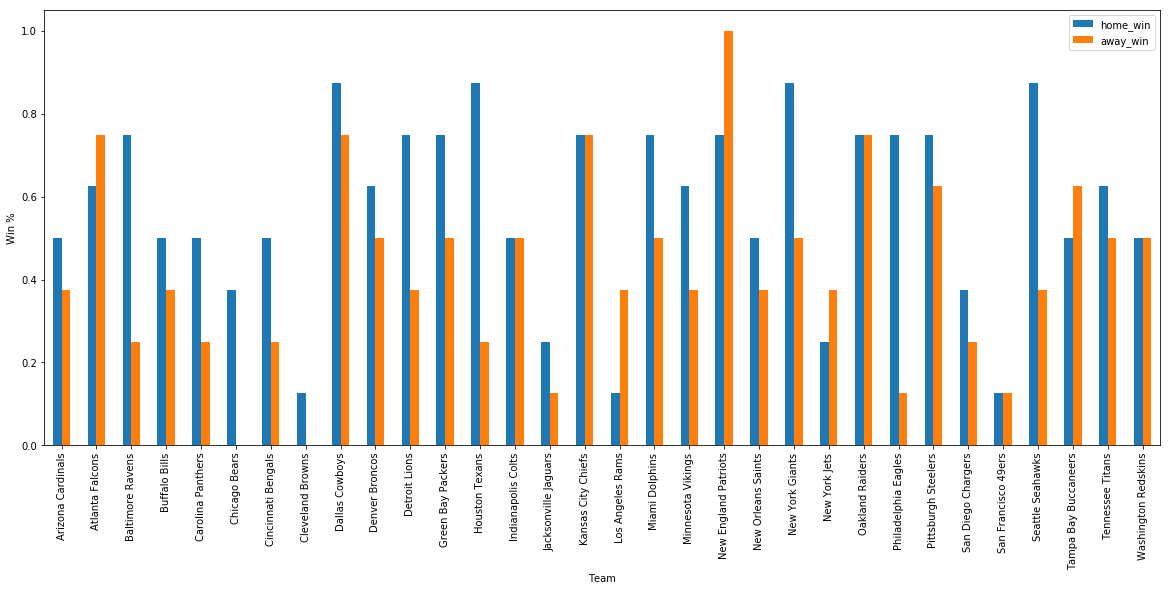

In [10]:
win_percentages = (df_results[['home_win', 'away_win']]/8).plot.bar(figsize=(20,8))
win_percentages.set_ylabel("Win %")
win_percentages.set_xlabel("Team")

Average score difference

Text(0.5, 0, 'Team')

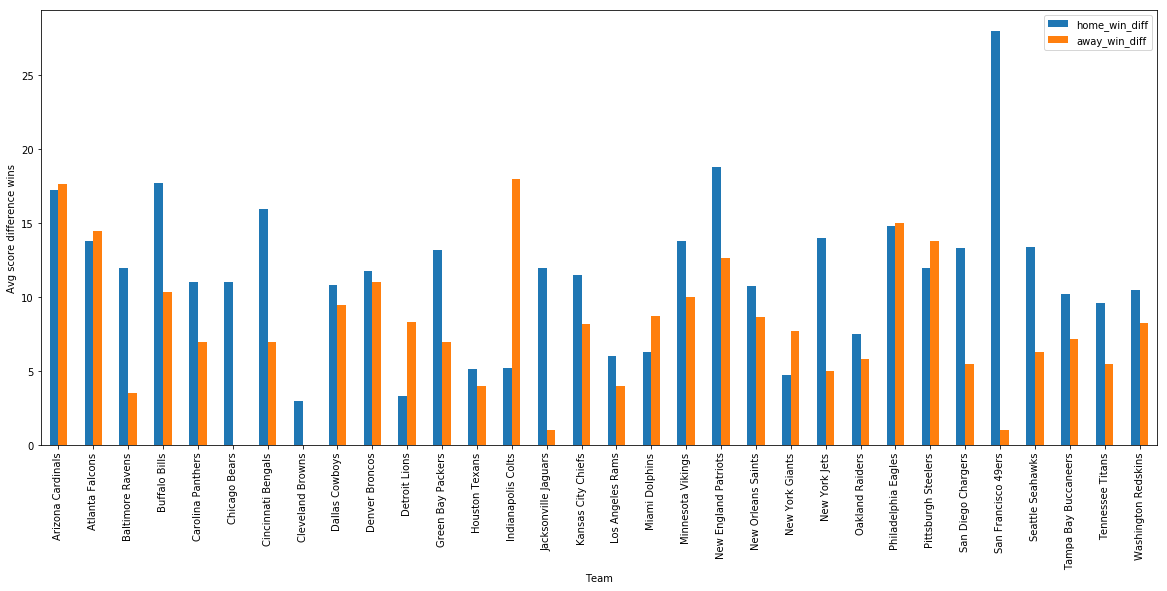

In [11]:
score_win_diff = df_results[['home_win_diff', 'away_win_diff']].plot.bar(figsize=(20,8))
score_win_diff.set_ylabel("Avg score difference wins")
score_win_diff.set_xlabel("Team")

In [12]:
len(df_results .loc[df_results ['home_win_diff'] > df_results ['away_win_diff']])

24

24 teams with higher home than away score win

In [13]:
home_greater = df_results.loc[df_results ['home_win_diff'] > df_results ['away_win_diff']]
home_greater['home_win_diff'].mean() - home_greater['away_win_diff'].mean()

5.950148809523809

In [14]:
stats.ttest_ind(home_greater['home_win_diff'], home_greater['away_win_diff'], equal_var = False)

Ttest_indResult(statistic=4.827606466012797, pvalue=1.9413479292782724e-05)

Turnovers

In [15]:
NFL_frame.head()

,Week,Winner/tie,Home_play,Loser/tie,Pts,Pts.1,YdsW,TOW,YdsL,TOL,score_diff
0,1,Denver Broncos,1,Carolina Panthers,21,20,307,3,333,1,1
1,1,Green Bay Packers,0,Jacksonville Jaguars,27,23,294,0,348,1,4
2,1,Baltimore Ravens,1,Buffalo Bills,13,7,308,1,160,0,6
3,1,Houston Texans,1,Chicago Bears,23,14,344,1,258,1,9
4,1,Kansas City Chiefs,1,San Diego Chargers,33,27,413,1,388,0,6


Text(0.5, 0, 'Team')

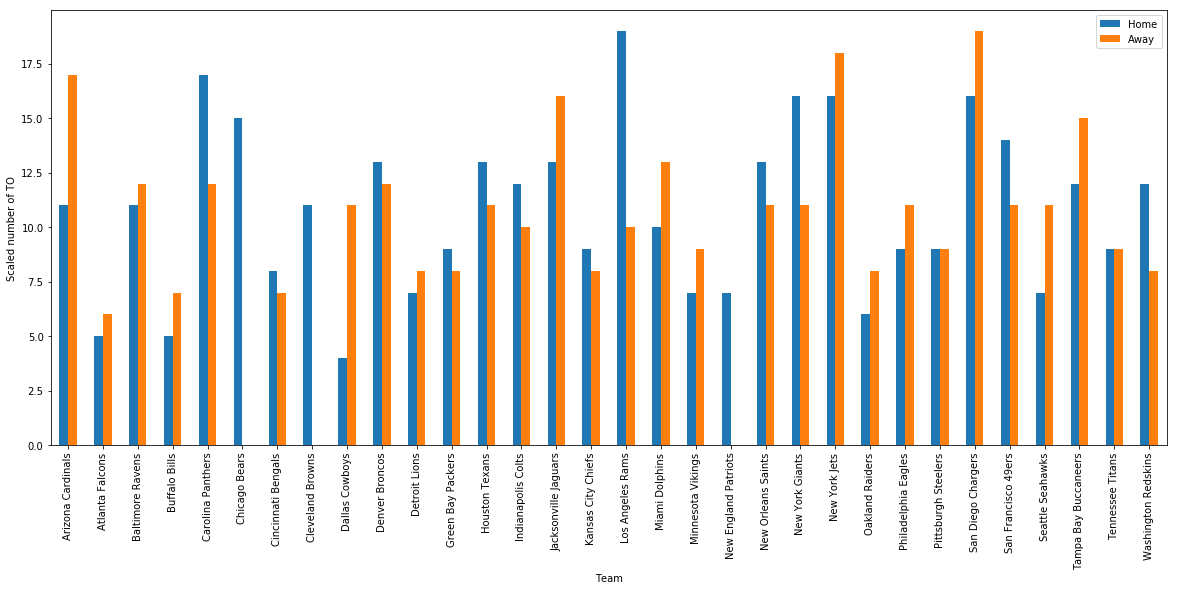

In [109]:
df_TO_mean_home = df_home.groupby('Winner/tie')['TOW'].sum() + df_away.groupby('Loser/tie')['TOL'].sum()
df_TO_mean_away = df_away.groupby('Winner/tie')['TOW'].sum() + df_home.groupby('Loser/tie')['TOL'].sum()

df_TO_mean = pd.DataFrame({'Home': df_TO_mean_home, 'Away': df_TO_mean_away})
df_TO_mean.fillna(0, inplace=True)

#df_TO_mean['Home'] = df_TO_mean['Home']/df_TO_mean['Home'].max()
#df_TO_mean['Away'] = df_TO_mean['Away']/df_TO_mean['Away'].max()

mean_hist = df_TO_mean[['Home', 'Away']].plot.bar(figsize=(20,8))
mean_hist.set_ylabel("Scaled number of TO")
mean_hist.set_xlabel("Team")

In [96]:
NFL_frame[NFL_frame['Loser/tie']=='Chicago Bears']

,Week,Winner/tie,Home_play,Loser/tie,Pts,Pts.1,YdsW,TOW,YdsL,TOL,score_diff
3,1,Houston Texans,1,Chicago Bears,23,14,344,1,258,1,9
31,2,Philadelphia Eagles,0,Chicago Bears,29,14,280,0,284,3,15
46,3,Dallas Cowboys,1,Chicago Bears,31,17,447,1,390,2,14
64,5,Indianapolis Colts,1,Chicago Bears,29,23,396,0,522,1,6
81,6,Jacksonville Jaguars,0,Chicago Bears,17,16,317,2,389,0,1
92,7,Green Bay Packers,1,Chicago Bears,26,10,406,1,189,2,16
138,10,Tampa Bay Buccaneers,1,Chicago Bears,36,10,360,1,283,4,26
150,11,New York Giants,1,Chicago Bears,22,16,329,0,315,1,6
168,12,Tennessee Titans,0,Chicago Bears,27,21,375,0,411,2,6
195,14,Detroit Lions,1,Chicago Bears,20,17,323,2,296,0,3
